<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Animated Motion of a Comet. 

### About this notebook

In this notebook we read the data obtained in a previous notebook to visualize the orbital motion of a comet around the Sun.


---

## A Comet-Sun System

We will read the file `'comet_orbit.txt'` obtained in a previous notebook to visualize the orbital motion of a comet around the Sun.

The system of units used is

- unit of mass: Solar mass
- units of distance: au
- units of time: years


In [1]:
path=''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/AC/Colab Notebooks/13. Animated Visualization/'


Mounted at /content/drive


In [3]:
import numpy as np

# Read and unpack the data from the file.
# The format includes coordinates and velocities: x y z vx vy vz
x, y, z, vx, vy, vz= np.loadtxt(path+'comet_orbit3D.txt', unpack=True)

---
## Simple 3D Plot

First we make a simple plot to see the orbit:

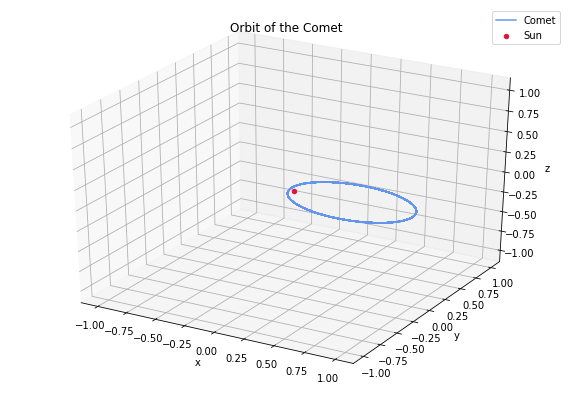

In [4]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
%matplotlib inline

# Boundaries of the plot
boundary = max(abs(np.max(x)), abs(np.min(x)), abs(np.max(y)), 
               abs(np.min(y)), abs(np.max(z)), abs(np.min(z)))*1.1

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.scatter(0., 0., 0., color=('crimson'), label='Sun')
ax.plot(x, y, z, color=('cornflowerblue'), label='Comet')

ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Orbit of the Comet')
ax.legend()
plt.show()


---

## Creating the Animation

In order to crrate the animation, we need the functions `matplotlib.animation` and `matplotlib.rc`.

To display the animation as a movie in the webpage, we will use the function `IPython.display.HTML`

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

First, we will setup the figure and the axes

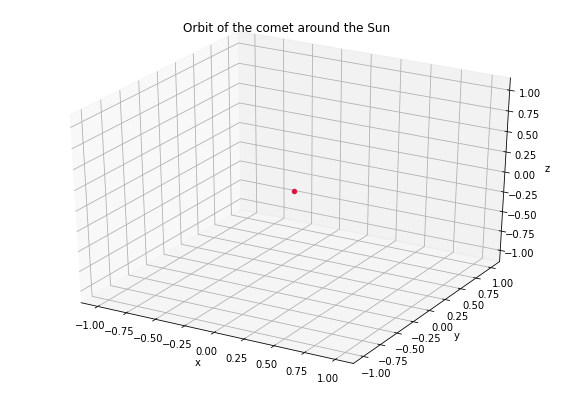

In [19]:
# create a figure and axes
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection="3d")

# Setting the axes properties
ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('Orbit of the comet around the Sun')

# Defines the location of the Sun
ax.scatter([0.], [0.], [0.], color=('crimson'), label='Sun')

In [7]:
# Total number of frames
N = len(x)
N

100000

We need to define an animate function to draw the data in each frame. This time we need to extra arguments which correspond to the coordinates data and the lines to be plotted.

In [20]:
def animate(num, data_lines, lines):
    for line, data in zip(lines, data_lines):
        # NOTE: there is no .set_data() for 3 dim data
        line.set_data(data[0:2, :50*num])
        line.set_3d_properties(data[2, :50*num])
    return lines

Now we use the `FuncAnimation` function to create the animation frames. We use 200 frames with a duration of 50 each.

In [22]:
# store the coordinates data into an array
data=[np.array([x, y, z])]

# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 
                 color='cornflowerblue')[0] for dat in data]

# Creating the Animation object
anim = animation.FuncAnimation(fig, animate, 
                               frames=500, fargs=(data, lines), interval=20)

# blit=True re-draws only the parts that have changed.
# Note the fargs in the FuncAnimation function.
#plt.show()

We can transform the animation to a jshtml video using

In [23]:
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

or we can create a html5 video using

In [24]:
HTML(anim.to_html5_video())